### Popular IDE

In this Notebook, I'm trying to find out the most popular IDE among the respondants of StackOverflow survey.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.shape[0] #number of rows in the dataset

19102

First, lets have a look at the values in IDE column

In [20]:
df.IDE.value_counts()

Notepad++; Visual Studio                                                                                 610
Visual Studio                                                                                            578
Vim                                                                                                      501
Notepad++; Visual Studio; Visual Studio Code                                                             391
Visual Studio; Visual Studio Code                                                                        380
Sublime Text                                                                                             344
Atom                                                                                                     180
Emacs                                                                                                    173
Eclipse                                                                                                  165
Sublime Text; Vim  

In [24]:
df.IDE[:20]   #first 20 values in IDE column

0                                           Atom; Xcode
1     Atom; Notepad++; Vim; PyCharm; RubyMine; Visua...
2                           Sublime Text; Vim; IntelliJ
3     Notepad++; Sublime Text; TextMate; Vim; IPytho...
4                                                   NaN
5                                            Emacs; Vim
6     Sublime Text; IPython / Jupyter; Visual Studio...
7                                                   Vim
8                Vim; Visual Studio; Visual Studio Code
9              Coda; Sublime Text; Visual Studio; Xcode
10                                        Visual Studio
11                                                  NaN
12                                                  NaN
13                                                  Vim
14                                         Emacs; Xcode
15                             Notepad++; Visual Studio
16                                           Emacs; Vim
17                                           Ema

It seems that some people haven't responded this survey question. (some rows have NaN)
Thus, some cleaning is required.

Further, this column has different combinations of answers. Thus, it's important for us to find out the different values, which were provided in the survey.

In order to do that, lets first remove the rows which are missing IDE.

In [38]:
df_drop = df.dropna(subset=['IDE'], axis=0)
df_drop.shape[0]   #number of rows after dropping rows with missing IDE values

13197

Around 5905 people haven't responded to this particular question.

Now it's time to find out the set of values which were available on the questionnare.

In order to do that, we have to do some processing.

In [39]:
arr = df_drop.IDE.unique()   #get the unique values in IDE column
arr

array(['Atom; Xcode',
       'Atom; Notepad++; Vim; PyCharm; RubyMine; Visual Studio; Visual Studio Code',
       'Sublime Text; Vim; IntelliJ', ...,
       'Atom; Emacs; Sublime Text; IntelliJ; PHPStorm; PyCharm',
       'Emacs; Notepad++; Android Studio; IPython / Jupyter; RStudio; Visual Studio',
       'Atom; Emacs; Eclipse; IntelliJ'], dtype=object)

In [42]:
ide_types = []
split_arr = []

for a in arr:
    split_arr = a.split('; ')
    
    for split_s in split_arr:
        if split_s not in ide_types:
            ide_types.append(split_s)
    
print(ide_types)

['Atom', 'Xcode', 'Notepad++', 'Vim', 'PyCharm', 'RubyMine', 'Visual Studio', 'Visual Studio Code', 'Sublime Text', 'IntelliJ', 'TextMate', 'IPython / Jupyter', 'NetBeans', 'Emacs', 'Coda', 'PHPStorm', 'Android Studio', 'RStudio', 'Komodo', 'Eclipse', 'Light Table', 'Zend']


Above is the list of IDEs which were available in the survey.

Below, we're creating a dictionary to hold the usage of each IDE, against the IDE name. Usage of all IDEs are initialized to zero (0).

In [61]:
ide_count_map = {}

for t in ide_types:
    ide_count_map.update( {t : 0} )
    
print(ide_count_map)

{'Atom': 0, 'Xcode': 0, 'Notepad++': 0, 'Vim': 0, 'PyCharm': 0, 'RubyMine': 0, 'Visual Studio': 0, 'Visual Studio Code': 0, 'Sublime Text': 0, 'IntelliJ': 0, 'TextMate': 0, 'IPython / Jupyter': 0, 'NetBeans': 0, 'Emacs': 0, 'Coda': 0, 'PHPStorm': 0, 'Android Studio': 0, 'RStudio': 0, 'Komodo': 0, 'Eclipse': 0, 'Light Table': 0, 'Zend': 0}


In [62]:
def get_ide_counts(df, ide_count_map):
    '''
    INPUT
    df - pandas dataframe
    ide_count_map - a dictionary with ide names and counts initialized to 0
    
    OUTPUT
    ide_map - a dictionary containing counts for each ide (key: ide, value: count)
    
    Steps:
    1.Slice out IDE column from the dataframe
    2.For each value in the column, split each IDE name
    3.For each IDE name in the splitted list, update the usage/count in dictionary 
    '''
    
    df_ide = df['IDE']   #slice out IDE column
    
    for val in df_ide:
        split_arr = val.split('; ')
        
        for ide in split_arr:  
            ide_count_map[ide] = ide_count_map[ide] + 1
            
    return ide_count_map

get_ide_counts(df_drop, ide_count_map)

{'Android Studio': 1929,
 'Atom': 2373,
 'Coda': 82,
 'Eclipse': 2620,
 'Emacs': 789,
 'IPython / Jupyter': 733,
 'IntelliJ': 2786,
 'Komodo': 81,
 'Light Table': 25,
 'NetBeans': 906,
 'Notepad++': 4405,
 'PHPStorm': 995,
 'PyCharm': 1205,
 'RStudio': 390,
 'RubyMine': 233,
 'Sublime Text': 3505,
 'TextMate': 188,
 'Vim': 3739,
 'Visual Studio': 5061,
 'Visual Studio Code': 2691,
 'Xcode': 1335,
 'Zend': 44}

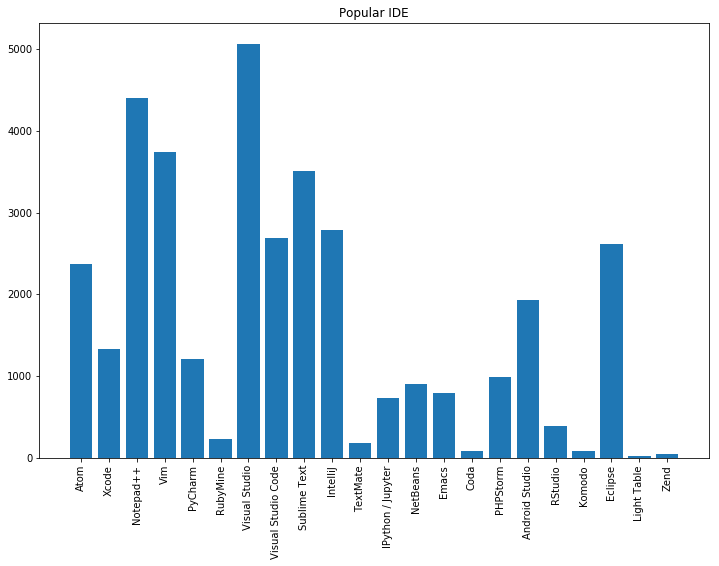

In [72]:
ide_names = list(ide_count_map.keys())
values = list(ide_count_map.values())

#tick_label does the some work as plt.xticks()
plt.bar(range(len(ide_count_map)),values,tick_label=ide_names)
plt.title('Popular IDE')

N = 2
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*N, plSize[1]*N) )

plt.xticks(rotation='vertical')
plt.show()

In [73]:
sorted(ide_count_map.items(), key=lambda x: x[1], reverse=True)

[('Visual Studio', 5061),
 ('Notepad++', 4405),
 ('Vim', 3739),
 ('Sublime Text', 3505),
 ('IntelliJ', 2786),
 ('Visual Studio Code', 2691),
 ('Eclipse', 2620),
 ('Atom', 2373),
 ('Android Studio', 1929),
 ('Xcode', 1335),
 ('PyCharm', 1205),
 ('PHPStorm', 995),
 ('NetBeans', 906),
 ('Emacs', 789),
 ('IPython / Jupyter', 733),
 ('RStudio', 390),
 ('RubyMine', 233),
 ('TextMate', 188),
 ('Coda', 82),
 ('Komodo', 81),
 ('Zend', 44),
 ('Light Table', 25)]

According to the above analysis, 5 mostly used IDEs are; Visual Studio, Notepad++, Vim, Sublime Text and IntelliJ